K-means Clustering Algorithm to Group Customers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

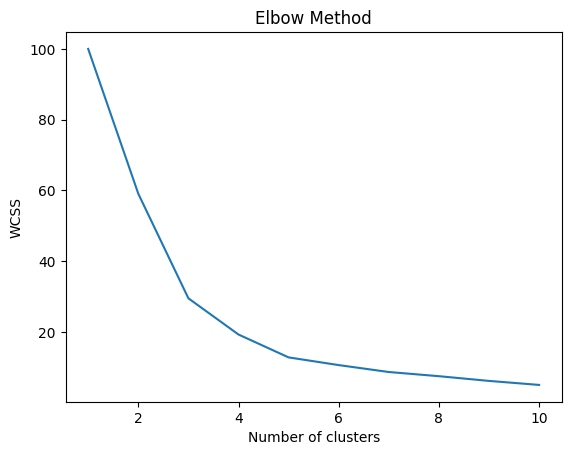

   CustomerID  Annual Income (k$)  Spending Score (1-100)  cluster
0           1                  15                      39        1
1           2                  15                      81        2
2           3                  16                       6        1
3           4                  16                      77        2
4           5                  17                      40        1
Cluster 0:
       CustomerID  Annual Income (k$)  Spending Score (1-100)  cluster
count   15.000000           15.000000               15.000000     15.0
mean    43.000000           37.800000               51.666667      0.0
std      4.472136            2.366432               22.225040      0.0
min     36.000000           33.000000               17.000000      0.0
25%     39.500000           37.000000               35.500000      0.0
50%     43.000000           39.000000               47.000000      0.0
75%     46.500000           39.500000               69.000000      0.0
max     50.000000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('customer_purchase_history.csv')

# Preprocessing
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Train model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
data['cluster'] = clusters
print(data.head())

# Analyzing the clusters
for i in range(3):
    print(f"Cluster {i}:")
    print(data[data['cluster'] == i].describe())


Saving customer_purchase_history.csv to customer_purchase_history (1).csv
First few rows of the dataset:
   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                  15                      39
1           2                  15                      81
2           3                  16                       6
3           4                  16                      77
4           5                  17                      40
Dataset with cluster labels:
   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                  15                      39        2
1           2                  15                      81        1
2           3                  16                       6        0
3           4                  16                      77        1
4           5                  17                      40        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


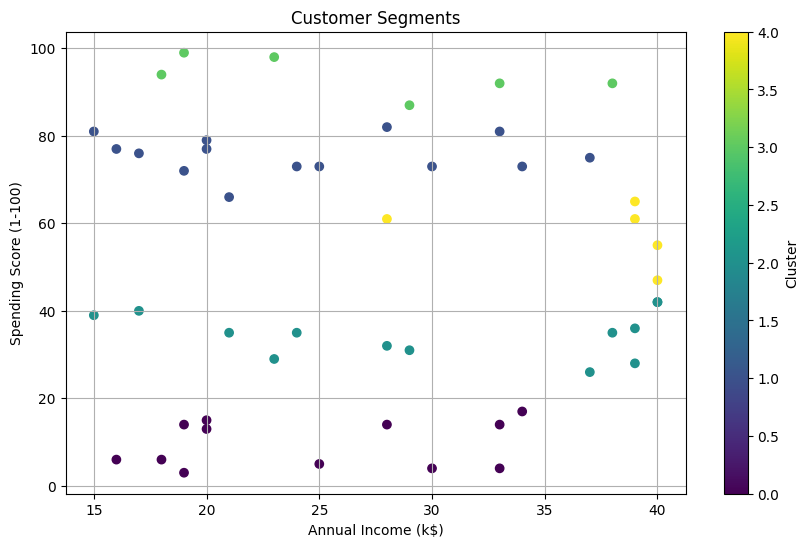

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the CSV File
uploaded = files.upload()

# Step 2: Load the CSV File
df = pd.read_csv('customer_purchase_history.csv')

# Step 3: Verify the Data
print("First few rows of the dataset:")
print(df.head())

# Step 4: Select the relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 5: Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Step 6: Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Step 7: Print the first few rows of the DataFrame with cluster labels
print("Dataset with cluster labels:")
print(df.head())

# Step 8: Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
